In [1]:
import pandas as pd
import sklearn

In [2]:
dt = pd.read_csv(r'C:\Users\Rishabh\Downloads\Churn_Modelling.csv')

In [3]:
y = dt['Exited']
dt.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
X = dt[['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary']]

In [5]:
X = pd.concat([X , pd.get_dummies(dt['Geography'],drop_first = True), pd.get_dummies(dt['Gender'],drop_first = True)],axis=1)

In [6]:
X
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
from keras.models import Sequential
model = Sequential()

Using TensorFlow backend.


In [8]:
from keras.layers import Dense
from keras.optimizers import Adam

In [9]:
model.add(Dense(units=6,input_dim=11,activation='relu',kernel_initializer='he_normal'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


In [11]:
#hidden layers
model.add(Dense(units=80,activation='relu'))

In [12]:
model.add(Dense(units=10,activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 80)                560       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                810       
Total params: 1,442
Trainable params: 1,442
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.add(Dense(units=12,activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 80)                560       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                810       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                132       
Total params: 1,574
Trainable params: 1,574
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.add(Dense(units=16,activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 80)                560       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                810       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                132       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                208       
Total params: 1,782
Trainable params: 1,782
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.add(Dense(units=16,activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 80)                560       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                810       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                132       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                208       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
Total params: 2,054
Trainable params: 2,054
Non-trainable params: 0
____________________________________________________

In [16]:
#output layer
model.add(Dense(units=1,activation='sigmoid'))

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train, verbose = 2, validation_data = (X_test, y_test),epochs=10)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
 - 0s - loss: 0.5291 - accuracy: 0.7895 - val_loss: 0.4949 - val_accuracy: 0.8035
Epoch 2/10
 - 0s - loss: 0.5074 - accuracy: 0.7945 - val_loss: 0.4958 - val_accuracy: 0.8035
Epoch 3/10
 - 0s - loss: 0.5078 - accuracy: 0.7945 - val_loss: 0.4962 - val_accuracy: 0.8035
Epoch 4/10
 - 0s - loss: 0.5077 - accuracy: 0.7945 - val_loss: 0.4957 - val_accuracy: 0.8035
Epoch 5/10
 - 0s - loss: 0.5080 - accuracy: 0.7945 - val_loss: 0.4964 - val_accuracy: 0.8035
Epoch 6/10
 - 0s - loss: 0.5076 - accuracy: 0.7945 - val_loss: 0.4957 - val_accuracy: 0.8035
Epoch 7/10
 - 0s - loss: 0.5076 - accuracy: 0.7945 - val_loss: 0.4953 - val_accuracy: 0.8035
Epoch 8/10
 - 0s - loss: 0.5078 - accuracy: 0.7945 - val_loss: 0.4956 - val_accuracy: 0.8035
Epoch 9/10
 - 0s - loss: 0.5080 - accuracy: 0.7945 - val_loss: 0.4960 - val_accuracy: 0.8035
Epoch 10/10
 - 0s - loss: 0.5079 - accuracy: 0.7945 - val_loss: 0.4957 - val_accuracy: 0.8035


In [21]:
loss = pd.DataFrame(model.history.history)

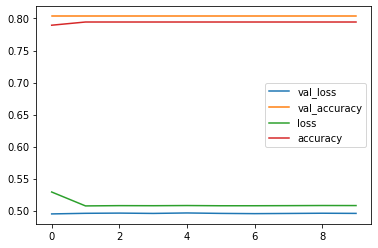

In [22]:
loss.plot()

In [23]:
y_test[0]

1

In [24]:
y_pred = model.predict(X_test)

In [25]:
y_pred

array([[0.2032773],
       [0.2032773],
       [0.2032773],
       ...,
       [0.2032773],
       [0.2032773],
       [0.2032773]], dtype=float32)

In [26]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

In [27]:
model.save('churn_model.hd5')